# Holocene Ice Analysis

### Introduction

The purpose of this notebook is to analyze the dynamics of the climate over the course of the Holocene at either end of the globe using ice core records from Greenland and Antarctica. Proxies for temperature will be used wherever possible in the form of oxygen isotope data (preferred) or hydrogen isotope data. Inferred temperature will be used if no other options are available.

In [1]:
import pyleoclim as pyleo
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import ammonyte as amt
import seaborn as sns
import pandas as pd
import matplotlib.transforms as transforms

from pylipd.lipd import LiPD

In [2]:
#We suppress warnings for these notebooks for presentation purposes. Best practice is to not do this though.
import warnings
warnings.filterwarnings('ignore')

In [3]:
lipd_path = './data/8k_ice'

all_files = LiPD()

if __name__=='__main__':
    all_files.load_from_dir(lipd_path)

record_names = all_files.get_all_dataset_names()

Directory ./data/8k_ice does not exist


In [4]:
series_list = []

# We specify the indices of interest in each dataframe by hand here

index_dict = {
    'GRIP.GRIP.1992' : 'd18O',
    'Renland.Johnsen.1992' : 'd18O',
    'EDML.Stenni.2010' : 'bagd18O',
    'EPICADomeC.Stenni.2010' : 'bagd18O',
    'Vostok.Vimeux.2002' : 'temperature',
    'GISP2.Grootes.1997' : 'd18O',
    'NGRIP.NGRIP.2004' : 'd18O',
    'TALDICE.Mezgec.2017' : 'd18O',
}

for record in record_names:
    d = LiPD()
    d.load(f'{lipd_path}/{record}.lpd')
    df = d.get_timeseries_essentials()
    row = df[df['paleoData_variableName']==index_dict[record]][df['time_variableName']=='age']
    lat = row['geo_meanLat'].to_numpy()[0]
    lon = row['geo_meanLon'].to_numpy()[0]
    elevation = row['geo_meanElev'].to_numpy()[0]
    value = row['paleoData_values'].to_numpy()[0]
    value_name = row['paleoData_variableName'].to_numpy()[0]
    value_unit = row['paleoData_units'].to_numpy()[0]
    time = row['time_values'].to_numpy()[0]
    time_unit = row['time_units'].to_numpy()[0]
    time_name = row['time_variableName'].to_numpy()[0]
    label = row['dataSetName'].to_numpy()[0]
    geo_series = pyleo.GeoSeries(time=time,
                                 value=value,
                                 lat=lat,
                                 lon=lon,
                                 elevation=elevation,
                                 time_unit=time_unit,
                                 time_name=time_name,
                                 value_name=value_name,
                                 value_unit=value_unit,
                                 label=label,
                                 archiveType='ice')
    series_list.append(geo_series)

geo_ms = pyleo.MultipleGeoSeries(series_list)

In [5]:
greenland_ms_list = []
antarctica_ms_list = []

for series in geo_ms.series_list:
    if series.lat > 0:
        series.time_unit = 'Years BP'
        greenland_ms_list.append(series)
    else:
        series.time_unit = 'Years BP'
        antarctica_ms_list.append(series)
        

In [6]:
end_time = 10000

Greenland analysis

In [7]:
color_list = sns.color_palette('colorblind')

In [8]:
greenland_ms = pyleo.MultipleSeries([series.slice((0,end_time)) for series in greenland_ms_list])
greenland_ms.stackplot(colors=color_list[:len(greenland_ms.series_list)])

ValueError: attempt to get argmax of an empty sequence

In [39]:
greenland_lp = []
m = 12
tau = 4

for series in greenland_ms.series_list:
    amt_series = amt.Series(
        time=series.time,
        value=series.value,
        time_name = series.time_name,
        value_name = series.value_name,
        time_unit = series.time_unit,
        value_unit = series.value_unit,
        label = series.label,
        clean_ts=False,
        sort_ts=None
    ).convert_time_unit('Years')
    td = amt_series.embed(m=m,tau=tau)
    print(f'{series.label} tau is: {td.tau}')
    eps = td.find_epsilon(eps=1,target_density=.05,tolerance=.01)
    rm = eps['Output']
    lp = rm.laplacian_eigenmaps(w_size=20,w_incre=4).convert_time_unit('Years BP')
    greenland_lp.append(lp)

/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_15775/2384839309.py:6: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  amt_series = amt.Series(


Renland.Johnsen.1992 tau is: 4
Initial density is 0.0155
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0155
Epsilon: 1.1726, Density: 0.0436
Epsilon: 1.1726, Density: 0.0436.


/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: No time_name parameter provided. Assuming "Time".
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_15775/2384839309.py:6: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  amt_series = amt.Series(


GISP2.Grootes.1997 tau is: 4
Initial density is 0.0149
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0149
Epsilon: 1.1756, Density: 0.0482
Epsilon: 1.1756, Density: 0.0482.


/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: No time_name parameter provided. Assuming "Time".
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_15775/2384839309.py:6: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  amt_series = amt.Series(


GRIP.GRIP.1992 tau is: 4
Initial density is 0.0180
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0180
Epsilon: 1.1598, Density: 0.0583
Epsilon: 1.1598, Density: 0.0583.


/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: No time_name parameter provided. Assuming "Time".
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_15775/2384839309.py:6: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  amt_series = amt.Series(


NGRIP.NGRIP.2004 tau is: 4
Initial density is 0.0115
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0115
Epsilon: 1.1923, Density: 0.0406
Epsilon: 1.1923, Density: 0.0406.


/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: No time_name parameter provided. Assuming "Time".
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)


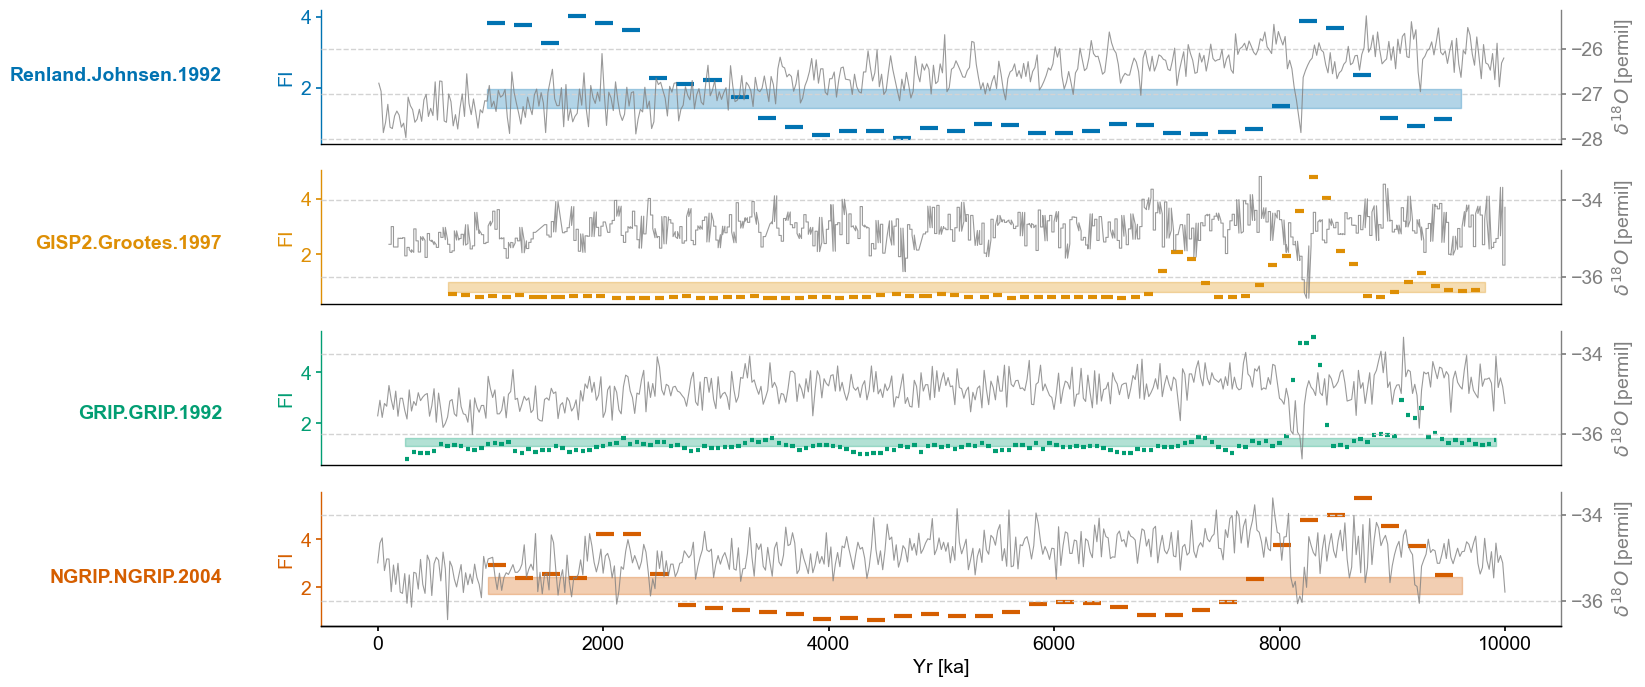

In [40]:
ms = greenland_ms
lp_series_list = greenland_lp

fig,axes = plt.subplots(nrows=len(lp_series_list),ncols=1,sharex=True,figsize=(16,8))
transition_timing = []

for idx,lp_series in enumerate(lp_series_list):
    ts = lp_series
    ts.label = lp_series.label
    ts.value_name = 'FI'
    ts.value_unit = None
    ts.time_name = 'Yr'
    ts.time_unit = 'ka'
    
    ax = axes[idx]
    
    ts_smooth = amt.utils.fisher.smooth_series(series=ts,block_size=3)
    upper, lower = amt.utils.sampling.confidence_interval(series=ts,upper=95,lower=5,w=50,n_samples=10000)

    ts.confidence_smooth_plot(
        ax=ax,
        background_series = ms.series_list[idx].slice((0,end_time)),
        transition_interval=(upper,lower),
        block_size=3,
        color=color_list[idx],
        figsize=(12,6),
        legend=True,
        lgd_kwargs={'loc':'upper left'},
        hline_kwargs={'label':None},
        background_kwargs={'ylabel':'$\delta^{18}O$ [permil]','legend':False,'linewidth':.8,'color':'grey','alpha':.8})
    
    trans = transforms.blended_transform_factory(ax.transAxes, ax.transData)
    ax.text(x=-.08, y = 2.2, s = ts.label, horizontalalignment='right', transform=trans, color=color_list[idx], weight='bold')
        
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_label_position('left')
    
    ax.get_legend().remove()
    ax.set_title(None)
    ax.grid(visible=False,axis='y')
    if idx != len(lp_series_list)-1:
        ax.set_xlabel(None)
        ax.spines[['bottom']].set_visible(False)
        ax.tick_params(bottom=False)



Antarctica analysis

(<Figure size 640x480 with 5 Axes>,
 {0: <Axes: ylabel='bagd18O [permil]'>,
  1: <Axes: ylabel='bagd18O [permil]'>,
  2: <Axes: ylabel='temperature [degC]'>,
  3: <Axes: ylabel='d18O [permil]'>,
  4: <Axes: xlabel='Age [Years BP]'>})

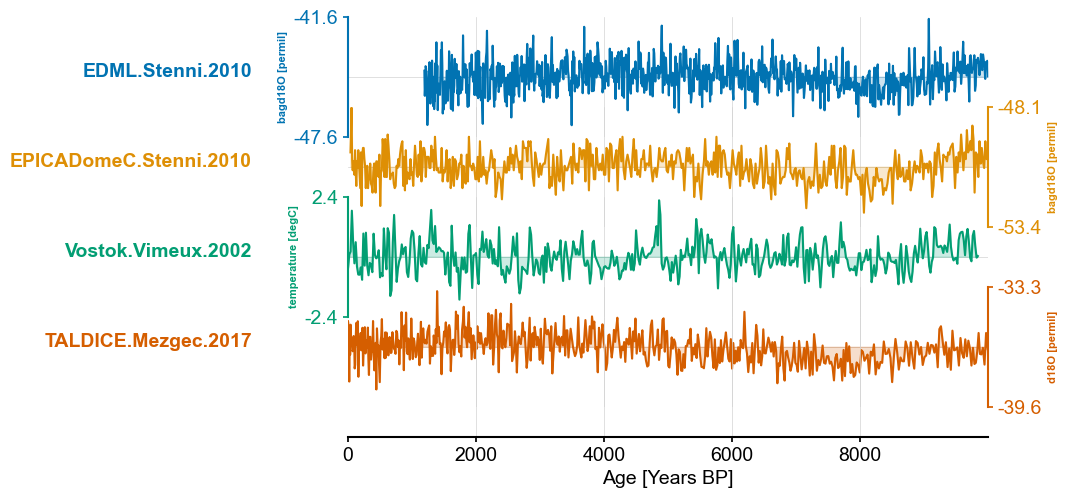

In [41]:
antarctica_ms = pyleo.MultipleSeries([series.slice((0,end_time)) for series in antarctica_ms_list])
antarctica_ms.stackplot(colors=color_list[:len(antarctica_ms.series_list)])

In [42]:
antarctica_lp = []
m = 12
tau = 3
eps_list= [2.2,2.2,10,2.2]

for idx,raw_series in enumerate(antarctica_ms.series_list):
    
    if not raw_series.is_evenly_spaced:
        series = raw_series.interp()
    else:
        series = raw_series
        
    amt_series = amt.Series(
        time=series.time,
        value=series.value,
        time_name = series.time_name,
        value_name = series.value_name,
        time_unit = series.time_unit,
        value_unit = series.value_unit,
        label = series.label,
        clean_ts=False,
        sort_ts=None
    ).convert_time_unit('Years')
    td = amt_series.embed(m=m,tau=tau)
    print(f'{series.label} tau is: {td.tau}')
    eps = td.find_epsilon(eps=eps_list[idx],target_density=.05,tolerance=.01)
    rm = eps['Output']
    lp = rm.laplacian_eigenmaps(w_size=20,w_incre=4).convert_time_unit('Years BP')
    antarctica_lp.append(lp)

/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_15775/3419447091.py:13: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  amt_series = amt.Series(


EDML.Stenni.2010 tau is: 3
Initial density is 0.0335
Initial density is not within the tolerance window, searching...
Epsilon: 2.3646, Density: 0.0569
Epsilon: 2.3646, Density: 0.0569.


/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: No time_name parameter provided. Assuming "Time".
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_15775/3419447091.py:13: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  amt_series = amt.Series(


EPICADomeC.Stenni.2010 tau is: 3
Initial density is 0.0624
Initial density is not within the tolerance window, searching...
Epsilon: 2.0761, Density: 0.0399
Epsilon: 2.1772, Density: 0.0581
Epsilon: 2.1772, Density: 0.0581.


/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: No time_name parameter provided. Assuming "Time".
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_15775/3419447091.py:13: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  amt_series = amt.Series(


Vostok.Vimeux.2002 tau is: 3
Initial density is 1.0000
Initial density is not within the tolerance window, searching...
Epsilon: 0.5000, Density: 0.0022
Epsilon: 0.9781, Density: 0.0025
Epsilon: 1.4534, Density: 0.0116
Epsilon: 1.8375, Density: 0.0542
Epsilon: 1.8375, Density: 0.0542.


/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: No time_name parameter provided. Assuming "Time".
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_15775/3419447091.py:13: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  amt_series = amt.Series(


TALDICE.Mezgec.2017 tau is: 3
Initial density is 0.0239
Initial density is not within the tolerance window, searching...
Epsilon: 2.4613, Density: 0.0546
Epsilon: 2.4613, Density: 0.0546.


/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: No time_name parameter provided. Assuming "Time".
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)


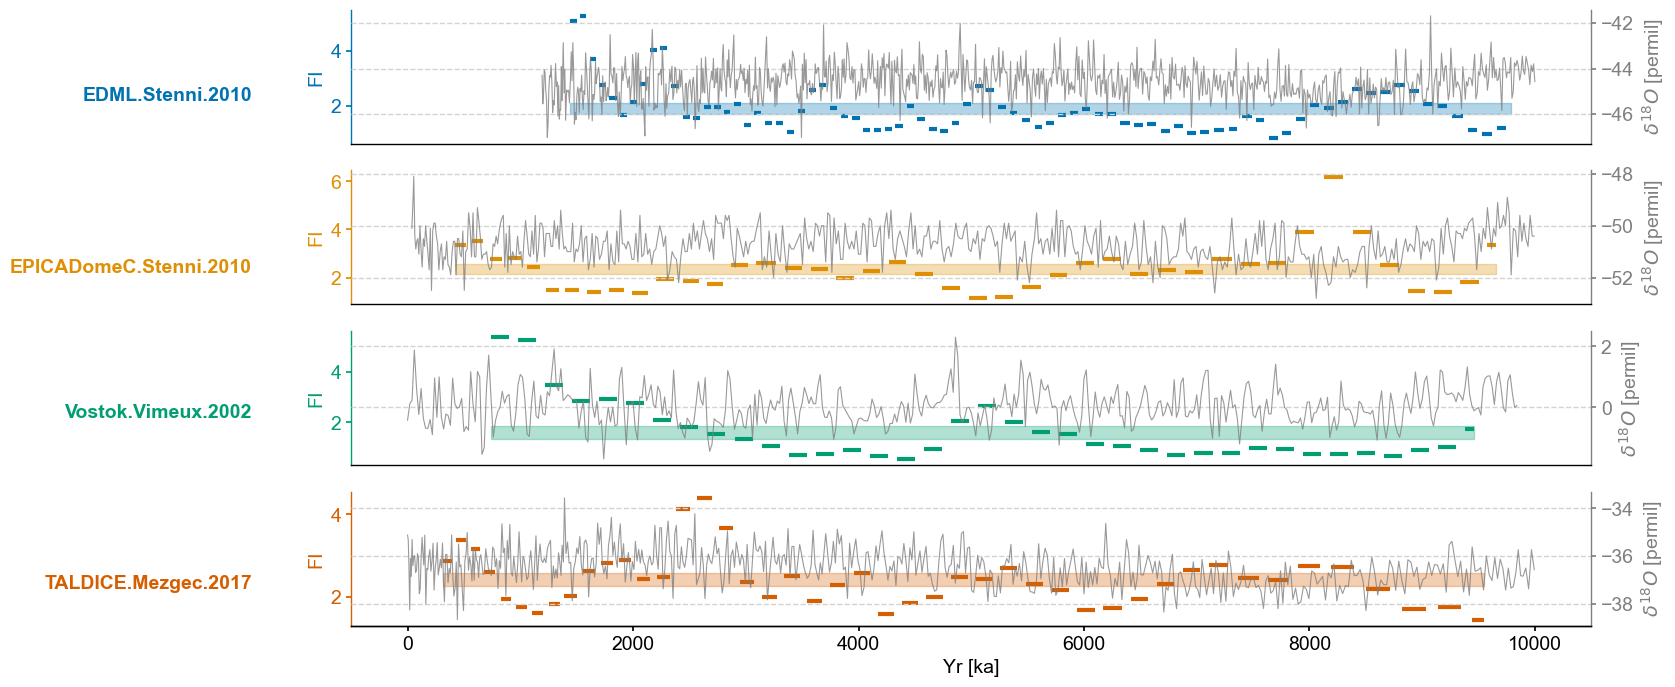

In [43]:
ms = antarctica_ms
lp_series_list = antarctica_lp

fig,axes = plt.subplots(nrows=len(lp_series_list),ncols=1,sharex=True,figsize=(16,8))
transition_timing = []

for idx,lp_series in enumerate(lp_series_list):
    ts = lp_series
    ts.label = lp_series.label
    ts.value_name = 'FI'
    ts.value_unit = None
    ts.time_name = 'Yr'
    ts.time_unit = 'ka'
    
    ax = axes[idx]
    
    ts_smooth = amt.utils.fisher.smooth_series(series=ts,block_size=3)
    upper, lower = amt.utils.sampling.confidence_interval(series=ts,upper=95,lower=5,w=50,n_samples=10000)
    ts.confidence_smooth_plot(
        ax=ax,
        background_series = ms.series_list[idx].slice((0,end_time)),
        transition_interval=(upper,lower),
        block_size=3,
        color=color_list[idx],
        figsize=(12,6),
        legend=True,
        lgd_kwargs={'loc':'upper left'},
        hline_kwargs={'label':None},
        background_kwargs={'ylabel':'$\delta^{18}O$ [permil]','legend':False,'linewidth':.8,'color':'grey','alpha':.8})
    
    trans = transforms.blended_transform_factory(ax.transAxes, ax.transData)
    ax.text(x=-.08, y = 2.2, s = ts.label, horizontalalignment='right', transform=trans, color=color_list[idx], weight='bold')
        
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_label_position('left')
    ax.yaxis.tick_left()
    
    ax.get_legend().remove()
    ax.set_title(None)
    ax.grid(visible=False,axis='y')
    if idx != len(lp_series_list)-1:
        ax.set_xlabel(None)
        ax.spines[['bottom']].set_visible(False)
        ax.tick_params(bottom=False)
